## Ein beispiel, wie die Bilder eingelesen, verarbeitet und anschließend zum Trainieren verwendet werden können.
Achtung, für dieses Script muss der Defaul Kernel verwendet werden!

In [1]:
## Use default Python3 Kernel for this script
import simple_image_script as sis
import numpy as np
import matplotlib.pyplot as plt

Folgender Codeabschnitt wird nur zum betrachten einzelner Bilder auf der Festplatte verwendet (z.B. visualisierung von Anomalien) und ist zum Trainieren nicht vorgesehen.

lese Bild: /data/Radarbilder_DWD/minutely/scaled_raa01-yw2017.002_10000-1604151110-dwd---bin.png
Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D)
Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D)
Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D)
Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D)


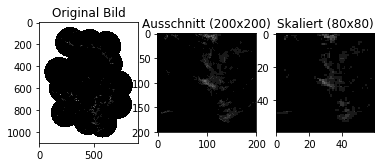

In [2]:
# Arbeiten direkt auf Bildern geht mit der Funktion:
SUBIMG_TUPLE = ((820, 400), (200, 200))

#path = "/data/Radarbilder_DWD/TEST/raa01-rw_10000-0506301650-dwd---bin.gz.png"        # RGBA Bild
path = "/data/Radarbilder_DWD/minutely/scaled_raa01-yw2017.002_10000-1604151110-dwd---bin.png"#"/data/Radarbilder_DWD/TEST/scaled_raa01-rw_10000-0506301650-dwd---bin.gz.png" # Grayscale Bild
print("lese Bild:", path)
# Einfaches einlesen eines Bildes:
OriginalBild = sis.open_one_img(path)
# Auswählen eines Ausschnittes (zb. region 200x200 Pixel um Konstanz):
Ausschnitt = sis.open_one_img(path, _subimg=SUBIMG_TUPLE)
# Skalierter output -> output-Bildgröße = 60x60
Skaliert = sis.open_one_img(path, _subimg=SUBIMG_TUPLE, _resize_shape=60)
# alles in einem, mit show_result -> öffnet Plot, welcher die einzelnen Schritte zeigt
Demo = sis.open_one_img(path, _subimg=SUBIMG_TUPLE, _resize_shape=(60, 60), raiseError=True, show_result=True, vmax=10)

# _subimg:       Tupel mit start Koordinate und größe des Auschnitts
# _resize_shape: Tupel oder int mit gewünschter outputgröße (_resize_shape=30 bedeutet 30x30 pixel)
# raiseError:    True = schmeißt Fehler, wenn nicht alles nach Plan verläuft (z.B. subimg nicht möglich), False liefert dann noch größtmögliches Bild
# show_result:   True = Zeigt die drei Bilder zu den eingegebenen Parametern (OriginalBild, Ausschnitt, Skaliert)
# Falls die Meldung: Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D) kommt, 
#                    handelt es sich um ein RGB oder RGBA Bild!

#print("zum vergleich, die RGBA-Bilder sehen wie folgt aus (selbes Bild, selber Ausschnitt, selbe Skalierung):")
#path = "/data/Radarbilder_DWD/TEST/raa01-rw_10000-0506301650-dwd---bin.gz.png"        # RGBA Bild
#Demo = sis.open_one_img(path, _subimg=((100, 100), (200, 200)), _resize_shape=(60, 60), raiseError=True, show_result=True)

(1100, 900) = 990000 pixel


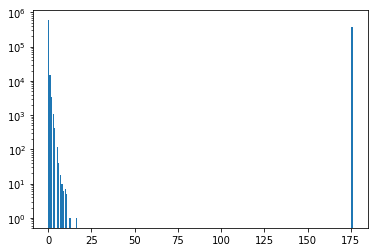

In [3]:
#a = OriginalBild[OriginalBild==174] = 0
print(OriginalBild.shape, "= {} pixel".format(1100*900))
plt.hist(OriginalBild.flatten(), bins=254, log=True)
#plt.hist(Skaliert.flatten(), bins=254, log=True, color="r")
plt.show()

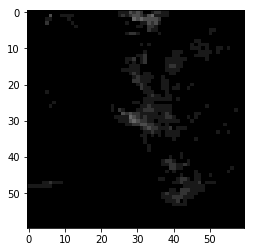

In [4]:
plt.imshow(Skaliert, vmin=0, vmax=10, cmap="gray")
plt.show()

Nachdem die Daten validiert sind, kann das Umwandeln der Bilder von der Platte zu np-arrays in form von Data-Label paaren gezeigt werden:

In [5]:
# Verwenden des Skripts zum trainieren eines Netzes:
#path = "/data/Radarbilder_DWD/TEST/"  # Pfad zu den Bilddaten
path = "/data/Radarbilder_DWD/minutely/"
max_num_samples = 2                   # Maximale anzahl Samples (kann auch -1 sein, für alle einlesen)
n_data = 1                            # Anzahl Zeitschritte (t) für die Eingangsdaten (x,y,t) bei n_data=3 werden also
                                        # 3 aufeinander folgende Bilder als Eingabe verwendet.
n_label = 1                           # Anzahl Zeitschritte (t) für das Label ( wie viele Zeitschritte vorhergesagt werden sollen)
start_img = None                      # Noch nicht verwendet, später soll hiermit trainingsdaten z.B ab 2010 sein und Label ab 1018
subimg_startpos = SUBIMG_TUPLE[0]     # Zum Ausschneiden eines Bereichs aus dem gesammtbild // (0,0) ist oben Links!
subimg_shape = SUBIMG_TUPLE[1]        # Größe des Ausschnittes von startpos beginnend
output_shape = 50                     # Größe des outputs (resize)

# einige Parameter haben default werte, angegeben werden muss auf jedenfall:
# path, max_num_samples, n_data, n_label
dc = sis.Data_converter(path, max_num_samples, n_data, n_label, start_img, subimg_startpos, subimg_shape,
                        output_shape, pre="scaled_raa01-yw2017.002_10000-",post="-dwd---bin.png")

print("-----------------------------\n\n")
print("Das Datenset wurde erfolgreich erstellt :)")
print("Insgesammt wurden",dc.get_number_samples(),"Sets gesammelt.")
print("Ein set ist ein Tupel aus (Daten, Label) sowohl daten als auch Label sind 3D-Arrays mit der shape:")
print("\tDaten:",dc.get_item_at(0)[0].shape,"\n\tLabel:", dc.get_item_at(0)[1].shape)
print("Batches sind derzeit nicht implementiert, um alle Daten iterativ durchgehen zu können, "+ 
      "kann die methode dc.get_next() verwendet werden.")

#for i in range(dc.get_number_samples()):
#    sample = dc.get_next()

Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D)
Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D)
Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D)
Eingelesenes Bild hat zu hohe Dimension (wird gekürzt auf 2D)
data (50, 50, 1) label (50, 50, 1)
-----------------------------


Das Datenset wurde erfolgreich erstellt :)
Insgesammt wurden 2 Sets gesammelt.
Ein set ist ein Tupel aus (Daten, Label) sowohl daten als auch Label sind 3D-Arrays mit der shape:
	Daten: (50, 50, 1) 
	Label: (50, 50, 1)
Batches sind derzeit nicht implementiert, um alle Daten iterativ durchgehen zu können, kann die methode dc.get_next() verwendet werden.


## Verwendung zum Training:
zunächst sollten die Bilder einmalig eingelesen und Zugeschnitten werden. die OriginalBilder auf der /data/ Platte bleiben erhalten

In [6]:
dc = sis.Data_converter(path, 100, 5, 1, None, SUBIMG_TUPLE[0], SUBIMG_TUPLE[1], 60, silent=True)

Die so eingelesenen Bilder können nun als Objekt mithilfe von pickle gespeichert werden. somit kann zu jedem Zeitpunkt einfach nur das Datenset geladen werden und die Berechnungen müssen nicht wiederholt werden.

In [7]:
dc.save_object("FileName", "Zusätzliche Info, z.B. Januar 2017 zentriert auf Konstanz")
#dc.save_object("TestData2016", "Zugeschnitten auf Position (820, 400), subimg größe (200, 200), entspricht ganz grob Konstanz. Ausgabebild wird auf 60x60 Pixel herabskaliert. Nicht ganz 2016 enthalten! ")

Nun ist vorerst alles vorbereitet für das Training des NeuronalenNetzes.
Die Daten können über das Modul `sample_bundle` geladen werden und bieten die Schnittstellen `info()`, `get_next()`,  `get_item_at(i)` oder `get_number_samples()`. Ein verarbeiten von ganzen Batches ist möglich und wird im unteren Abschnitt vorgestellt.

In [8]:
import sample_bundle
sb = sample_bundle.load_Sample_Bundle("FileName")
print(sb.info())

Set Bundle with 2000 Samples Zugeschnitten auf Position (820, 400), subimg größe (200, 200), entspricht ganz grob Konstanz. Ausgabebild wird auf 60x60 Pixel herabskaliert. Nicht ganz 2016 enthalten! 


Die jedes Sample ist ein Tupel aus `(Daten, Label)`. Hierbei sind sowohl `Daten` als auch `Label` ein 3D np-Array. Die Größe der einzelnen Dimensionen konnte zum erstellzeitpunkt festgelegt werden, ein verändern ist in diesem Objekt nicht mehr vorgesehen.

In [ ]:
sample = sb.get_next()
print("Sample ist vom Typ",type(sample))
print("Daten und Label sind 3D arrays", sample[0].shape, sample[1].shape, "die 3te Dimension gibt an,"+ 
      "wie viele Bilder (zeitlich versetzt) hintereinander stecken.")

Zum erstellen von Batches wird die Methode `.get_batch(batchsize, random, axis)` zur verfügung gestellt.
Der Parameter `batchsize` gibt an, wie viele 3D Matritzen zu einem Batch zusammengefügt werden sollen. *Achtung* der letzte Batch kann kleiner sein, wenn batchsize nicht ganzzahliges vielfaches von anzahl Samples ist.
der Parameter `random` sorgt für eine zufällige anordnung der Samples in den Batches, kann aber auch deaktiviert werden.
der Parameter `axis` gibt an, in welcher Dimension die Samples liegen, default ist die shape (x, y, nData, nSamples) wobei n_data, der anzahl Bilder pro Sample und nSamples eben der Batchsize antspricht.

In [ ]:
d,l = sb.get_batch(batchsize=11,random=True, axis=3)
print("anz Batches:",len(d))
print("Normale Shape eines Batches\t\t\t",d[0].shape,l[0].shape)
print("letztes Batch kann von der shape abweichen\t",d[-1].shape,l[-1].shape)

Die erhaltenen Objekte `d, l` sind jeweils Listen mit den generierten 4D Matritzen (Batches). `d` enthält die Daten für das Netz, `l` die zugehörigen Label. In Obrigem Beispiel sind die Bilder 65x65 Pixel groß, die Daten bestehen aus 5 Bildern, während das Label nur ein Bild ist (Bild==Zeitschritt). Der letzte Parameter entspricht der Batchsize.

In [ ]:
import evaluate_images as evi2

path = "/data/Radarbilder_DWD/2018/RW201810.tar.gz/"
evi2.get_statistic(path,-1)